In [1]:
import pandas as pd

movies = pd.read_csv('fandango_score_comparison.csv')
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


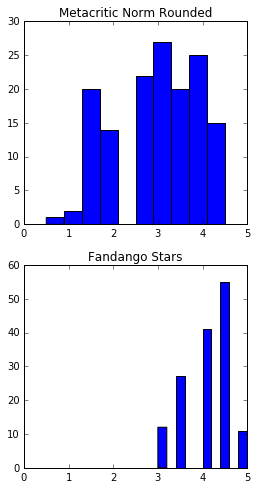

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2) = plt.subplots(2, 1, figsize = (4,8))
ax1.hist(movies['Metacritic_norm_round'])
ax1.set_title('Metacritic Norm Rounded')
ax1.set_xlim(0,5)
ax2.hist(movies['Fandango_Stars'])
ax2.set_title('Fandango Stars')
ax2.set_xlim(0,5)
plt.show()

## Metacritic Scores vs Fandango Stars

- From the histograms, we see that all ratings in the Fandango dataset are found in the range 3-5. 
- On the other hand, Metacritic ratings have a much greater range, .5 - 4.5. 
- This leads one to the suspicion that Fandango may manipulating their ratings in some way.

In [3]:
import numpy as np

fandango_stars_mean = movies['Fandango_Stars'].mean()
meta_norm_round_mean = movies['Metacritic_norm_round'].mean()
fandango_stars_median = np.median(movies['Fandango_Stars'])
meta_norm_round_median = np.median(movies['Metacritic_norm_round'])
fandango_stars_std = np.std(movies['Fandango_Stars'])
meta_norm_round_std = np.std(movies['Metacritic_norm_round'])
fandango_stars_mean, meta_norm_round_mean, fandango_stars_median, meta_norm_round_median, fandango_stars_std, meta_norm_round_std 

(4.0890410958904111,
 2.9726027397260273,
 4.0,
 3.0,
 0.53853216126995307,
 0.98756102970386306)

## Metacritic vs. Fandango Statistics

- The mean and median of the Fandango dataset are both significantly larger that those for the Metacritic dataset.
- The Metacritic dataset is negatively skewed, while the Fandango dataset is positively skewed.
- The standard deviation show much less variation in the Fandango scores than in the Metacritic scores.

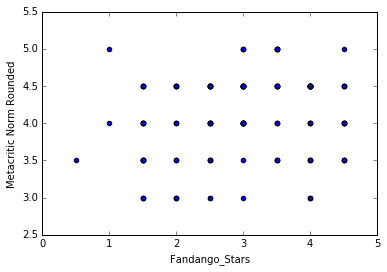

In [13]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.xlabel('Fandango_Stars')
plt.ylabel('Metacritic Norm Rounded')
plt.show()

In [7]:
movies['fm_diff'] = movies['Fandango_Stars'] - movies['Metacritic_norm_round']
movies['fm_diff'] = np.abs(movies['fm_diff'])
movies.sort_values(by='fm_diff', ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [8]:
import scipy.stats as sp

fan_meta_r, fan_meta_p = sp.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
fan_meta_r

0.17844919073895918

## Fandango & Metacritic Correlation

- There is a very small correlation between the Fandango dataset and the Metacritic dataset.
- This implies that Fandango not only increases the ratings of the movies in the dataset, but the increase in rating may vary greatly from one movie to another.

In [10]:
fan_slope, fan_intercept, fan_meta_r, fan_meta_p, stderr_slope = sp.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [12]:
pred_fan_3 = fan_slope * 3 + fan_intercept
pred_fan_3

4.0917071528212041

In [ ]:
pred_fan_1 = fan_slope * 1 + fan_intercept
pred_fan_5 = fan_slope * 5 + fan_intercept
plt.scatter(moveis['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot([1,5], [pred_fan_1,pred_fan_5])
plt.xlim(1,5)
plt.xlabel()